# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [2]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

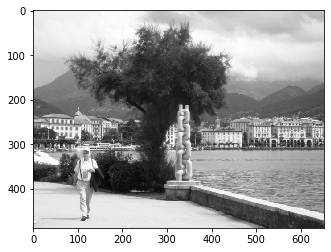

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

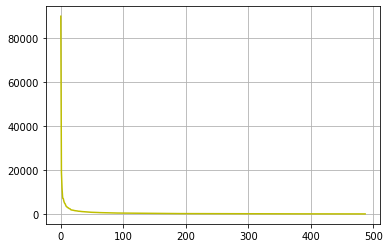

In [5]:
def g(x):
    return S[x][x]

m = [i for i in range(len(S))]
plt.plot(m, g(m), 'y');
plt.grid(True)

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

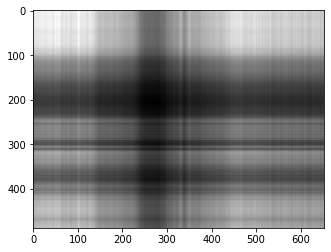

In [6]:
u = U[:, 0:1]
s = np.diag(S)[0:1, 0:1]
vt = VT[0:1, :]
new = u.dot(s).dot(vt)
imgplot = plt.imshow(new, cmap='gray')

**Комментарий**: Так как в разложении $A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$ участвует только самое первое слагаемое, то этого не хватает для нормального разложения, даже несмотря на то, что мы используем матрицу $u_k\sigma_{k}v_k^T$ с максимальным сингулярным значением, поскольку ещё есть и другие достаточно большие значения. Поэтому получившийся результат не удивляет нас.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

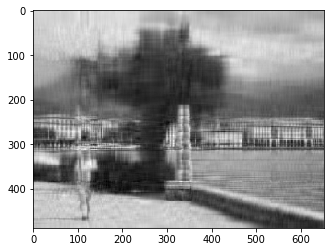

In [7]:
u = U[:, 0:19]
s = np.diag(S)[0:19, 0:19]
vt = VT[0:19, :]
new = u.dot(s).dot(vt)
imgplot = plt.imshow(new, cmap='gray')

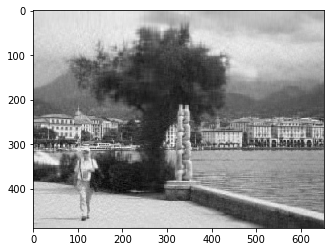

In [8]:
u = U[:, 0:50]
s = np.diag(S)[0:50, 0:50]
vt = VT[0:50, :]
new = u.dot(s).dot(vt)
imgplot = plt.imshow(new, cmap='gray')

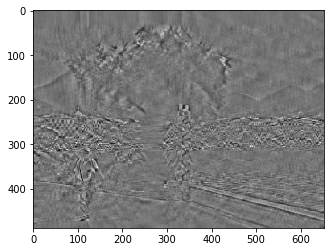

In [9]:
u = U[:, 19:100]
s = np.diag(S)[19:100, 19:100]
vt = VT[19:100, :]
new = u.dot(s).dot(vt)
imgplot = plt.imshow(new, cmap='gray')

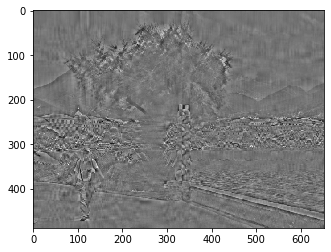

In [10]:
u = U[:, 19:]
s = np.diag(S)[19:, 19:]
vt = VT[19:, :]
new = u.dot(s).dot(vt)
imgplot = plt.imshow(new, cmap='gray')

**Комментарий**: Как мы и предполагали, суммы нескольких первых компонент дают приближенную картинку.
Мы видим, что сумма первых 20-ти компонент даёт уже неплохую картинку.
Сумма первых 50-ти ещё сильнее улучшает картинку. Она уже близка к изначальной.
Можно также заметить, что очень важными являются именно первые 20, поскольку убрав их из суммы, мы получим едва различимую картинку.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

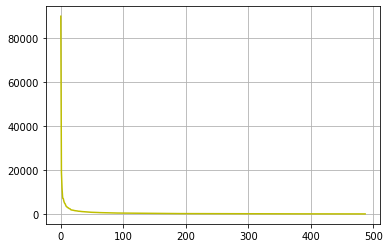

In [11]:
def g(x):
    return S[x][x]

m = [i for i in range(len(S))]
plt.plot(m, g(m), 'y');
plt.grid(True)

**Комментарий**: Как можно заметить, после 100 значение диагональных элементов близко к 0. Поэтому добавление компонент после 100 не будет давать сильного улучшения картинки. Это же видно и по предыдущему заданию, что только сумма самых первых компонент (например, от 1 до 50-й) уже будет давать хороший результат, поэтому кажется что, 100 это как раз и будет золотая середина между получением хорошего результата и экономии памяти.

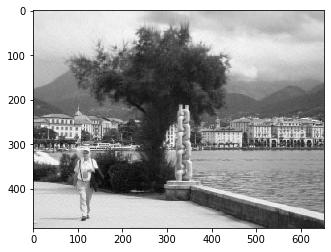

In [12]:
u = U[:, 0:100]
s = np.diag(S)[0:100, 0:100]
vt = VT[0:100, :]
new_A = u.dot(s).dot(vt)
imgplot = plt.imshow(new_A, cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

**Комментарий**: Изначально изображение хранится в матрице 488x653 = 318664.
В виде компонент разложения есть 3 матрицы 100x653, 488x100, 100, тогда получается 100*(488+1+653) = 114200.
Получается, мы используем в 2.8 раз меньше памяти.

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [13]:
U_new, S_new, VT_new = U[:, 0:101], S[0:101], VT[0:101, :]
print("Исходник весит: " + str(U.nbytes + S.nbytes + VT.nbytes) + ", мое приближение весит: " + str(U_new.nbytes + S_new.nbytes + VT_new.nbytes))

Исходник весит: 4458368, мое приближение весит: 922736


**Комментарий**: Разница примерно в 5 раз. Вероятно так может происходить, потому что компьютер не смог найти для больших данных точное подходящее свободное место в памяти, поэтому он зарезервировал участок в памяти больших размеров. А для маленьких объктов он легко нашел более подходящие места в памяти и поэтому меньше памяти утекло в никуда.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Комментарий**: Итак, будем работать с матрицей $X^TX$. 

Ясно, что она симметрична, а поэтому, расматривая ее как матрицу линейного оператора, мы понимаем, что существует ортонормированный базис из собственных векторов. Пусть $\left( v_{1}, \ldots, v_n \right)$ - этот базис с собственными значениями $\left( \sigma_{1}^2, \ldots, \sigma_n^2 \right)$. 

Поскольку $w \in \langle v_{1}, \ldots, v_n \rangle$ (потому что это базис, в котором лежит $w$), то

$$w = c_1v_1 + \ldots + c_nv_n, (*)$$

для некоторого набора коэффициентов $\left( c_{1}, \ldots, c_n \right)$. Получаем $|w|^2 = c_1^2 + \ldots + c_n^2$. 

При этом мы помним, что 

$$ |Xw|^2 = (Xw)^T\cdot(Xw) = w^TX^TXw = w^T \cdot (X^TXw) $$

Объединяя данные факты, что $\left( v_{1}, \ldots, v_n \right)$ - собственные векторы с собственными значениями $\left( \sigma_{1}, \ldots, \sigma_n \right)$ для $X^TX$ и $(*)$, получаем следующее:

$$ X^TXw = X^TX (c_1v_1 + \ldots + c_nv_n) = c_1\sigma_1^2v_1 + \ldots + c_n\sigma_n^2v_n$$

Теперь, так как $\left( v_{1}, \ldots, v_n \right)$ - ортонормированный базис, получаем, что:

$$ |Xw|^2 = w^T \cdot (X^TXw) = c_1^2\sigma_1^2 + \ldots + c_n^2\sigma_n^2$$

Так как $\sigma_1^2$ - наибольшее сингулярное значение, то истинно следующее: 

$$ |Xw|^2 \leq \sigma_1^2(c_1^2 + \ldots + c_n^2) = \sigma_1^2\cdot |w|^2$$
$$ \frac{|Xw|^2}{|w|^2} \leq \sigma_1^2 $$
$$ \frac{|Xw|}{|w|} \leq \sigma_1 $$

Равенство будет достигаться, если положить $w$ равным собственному вектору, соответствующему собственному значению $\sigma_1^2$. Действительно, в таком случае $|Xw|^2 = w^T \cdot (X^TXw) = w^T\cdot\sigma_1^2 w = \sigma_1^2\cdot w^Tw = \sigma_1^2|w|^2 \Rightarrow \frac{|Xw|^2}{|w|^2} = \sigma_1^2$, и на этом этапе дальнейшее уже становится очевидным. Тем самым, мы доказали, что
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw|$$

Далее мы можем сделать вывод из $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$, что $|Xv| \leq \sigma_1|v|$. Используя сделанный в предыдущем предложении вывод, неравенство Коши-Буняковского замечаем следующее:

$$ |u^T Xv| \leq |u^T||Xv|\leq|u^T| |\sigma_1v| = \sigma_1|u^T||v| = \sigma_1 $$

Равенство будет достигаться, если положить $v$ равным собственному вектору матрицы $X^TX$, соответсвующему собственному значению $\sigma_1^2$. Действительно, в таком случае $|Xv|^2 = v^T \cdot (X^TXv) = v^T\cdot\sigma_1^2 v = \sigma_1^2\cdot v^Tv = \sigma_1^2|v|^2 \Rightarrow |Xv| = \sigma_1|v|$. А чтобы неравенсво Коши-Буняковского давало нам равенсво, возьмем $u$ любой нормированный вектор, который пропорционален вектору $Xv$. На этом этапе дальнейшее уже становится очевидным.

В итоге мы получили, что требовалось доказать:

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

**Комментарий**: 1) ker $\mathcal{A} = \langle v_{r+1}, ... v_n \rangle$
$$A = U\Sigma V^T |*V$$
$$AV = U\Sigma V^TV = U\Sigma$$
$$ rk A = r \Rightarrow \Sigma = diag(\sigma_1, ..., \sigma_r, 0... 0) $$
Таким образом, столбцы r+1, ... n нулевые. Так как $v_1, .. v_n$ - базис пространства, $ker \mathcal{A} =  \langle v_{r+1}, ... v_n \rangle$

2) Im $\mathcal{A} = \langle u_1, \ldots, u_r \rangle$

Так как $ker \mathcal{A} =  \langle v_{r+1}, ... v_n \rangle$, образы $v_1, ... v_r$ будут давать базис образа. Выразим $u_i$. $$ u_i = \frac{1}{\sigma_i}Av_i $$
$\Rightarrow u_i$ - образ вектора $v_i$. Следовательно, мы получили образ $v_1, .. v_n$.
$\Rightarrow Im \mathcal{A} = \langle u_1, \ldots, u_r \rangle$$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

**Комментарий**: $A = U\Sigma V^T. rk A = n$, так как столбцы А линейно независимы. $\Rightarrow  rk \Sigma = n$
$$A = U\Sigma V^T$$
$$A^T = V\Sigma^TU^T$$
$$A^TA = V\Sigma^TU^TU\Sigma V^T$$
$$ P = U\Sigma V^T (V\Sigma^TU^TU\Sigma V^T)^{-1} V\Sigma^TU^T$$
$$ P = U\Sigma (\Sigma^T\Sigma)^{-1} \Sigma^TU^T $$
$$ \Sigma^T\Sigma = \left( \begin{array}{cccc} \sigma_1^2 & 0 & \ldots & 0\\ 0 & \sigma_2^2 & \ldots & 0 \\ \vdots & \vdots & \ldots & \vdots\\ 0 & 0 & \ldots & \sigma_n^2\\ \end{array}\right)$$
$$ (\Sigma^T\Sigma)^{-1} = \left( \begin{array}{cccc} \sigma_1^{-2} & 0 & \ldots & 0\\ 0 & \sigma_2^{-2} & \ldots & 0 \\ \vdots & \vdots & \ldots & \vdots\\ 0 & 0 & \ldots & \sigma_n^{-2}\\ \end{array}\right)$$
$$
\Sigma (\Sigma^T \Sigma)^{-1} = \left( \begin{array}{cccc} \sigma_{1} & 0 & \ldots & 0\\ 0 & \sigma_{2} & \ldots & 0 \\ \vdots & \vdots & \ldots & \vdots\\ 0 & 0 & \ldots & \sigma_{n}\\ 0 & 0 & \ldots & 0\\ \vdots & \vdots & \ldots & \vdots\\ 0 & 0 & \ldots & 0\\ \end{array} \right)  \left( \begin{array}{cccc} \sigma_{1}^{-2} & 0 & \ldots & 0\\ 0 & \sigma_{2}^{-2} & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots\\ 0 & 0 & \ldots & \sigma_{n}^{-2}\\ \end{array} \right) = \left( \begin{array}{cccc} \sigma_{1}^{-1} & 0 & \ldots & 0 \\ 0 & \sigma_{2}^{-1} & \ldots & 0 \\ \vdots & \vdots & \ldots  & \vdots\\ 0 & 0 & \ldots & \sigma_{n}^{-1}\\ 0 & 0 & \ldots & 0\\ \vdots & \vdots & \ldots & \vdots\\0 & 0 & \ldots & 0\\ \end{array}\right)$$
$$\Sigma (\Sigma^T \Sigma)^{-1} \Sigma^T = \left(
\begin{array}{cccc} 1 & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\ 0 & 1 & \ldots & 0 & \ldots & 0 & 0 & 0\\ \vdots & \vdots & \ldots  & \vdots & \ldots & \vdots & \vdots  & \vdots\\ 0 & 0 & \ldots & 1 & \ldots & 0 & 0 & 0\\ 0 & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\ \vdots & \vdots & \ldots & \vdots & \ldots & \vdots & \vdots & \vdots\\ 0 & 0 & \ldots & 0 &\ldots & 0 & 0 & 0\\ \end{array}\right)$$

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


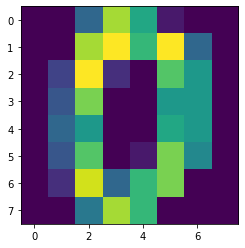

In [15]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [16]:
digits_U, digits_S, digits_VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

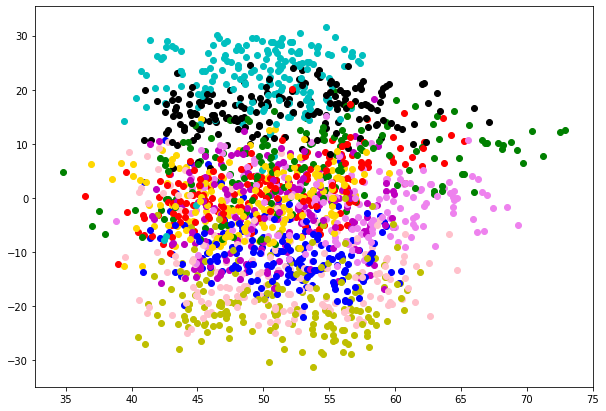

In [17]:
digits_US = digits_U.dot(np.diag(digits_S))
digits_US = digits_US[:,  0:2]
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'gold', 'violet', 'pink']
for a,b,c in zip(digits_US[:, 0], digits_US[:, 1], range(digits.data.shape[0])):
    a = np.array(a)
    b = np.array(b)
    plt.scatter(a, b, color = colors[digits.target[c]])

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

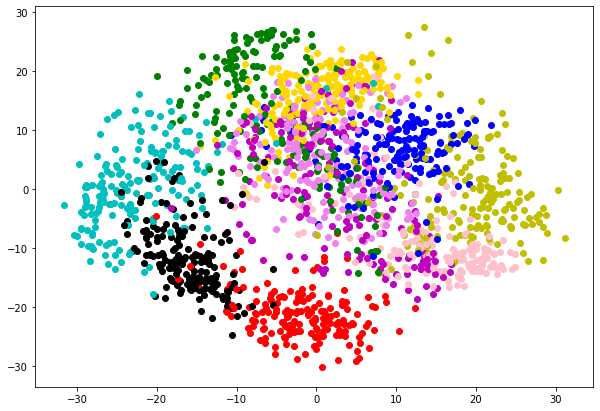

In [18]:
digits_U, digits_S, digits_VT = svd(digits.data-digits.data.mean(axis=0), full_matrices=False)
digits_US = digits_U.dot(np.diag(digits_S))
digits_US = digits_US[:,  0:2]
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'gold', 'violet', 'pink']
for a,b,c in zip(digits_US[:, 0], digits_US[:, 1], range(digits.data.shape[0])):
    a = np.array(a)
    b = np.array(b)
    plt.scatter(a, b, color = colors[digits.target[c]])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

**Комментарий**: На первой картинке цвета расположены хаотично. На второй же точки сгруппированы по цветам.
Мы нормализовали данные.
Если какие-то какие-то переменные сильно отличаются от других, то выборочная дисперсия не будет давать большие значения, а будет характеризовать данные в целом.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

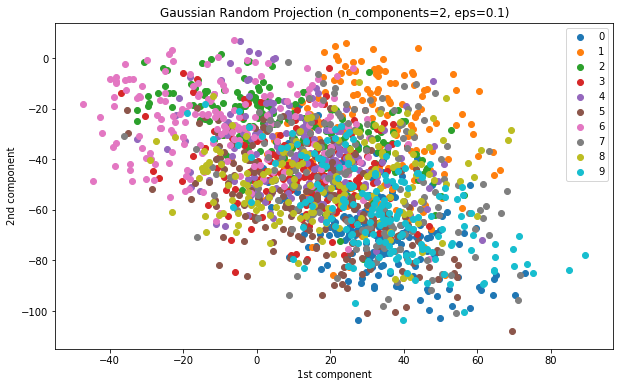

In [79]:
from sklearn.random_projection import GaussianRandomProjection

X_red = GaussianRandomProjection(n_components=2, eps=0.1).fit_transform(digits.data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=2, eps=0.1)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

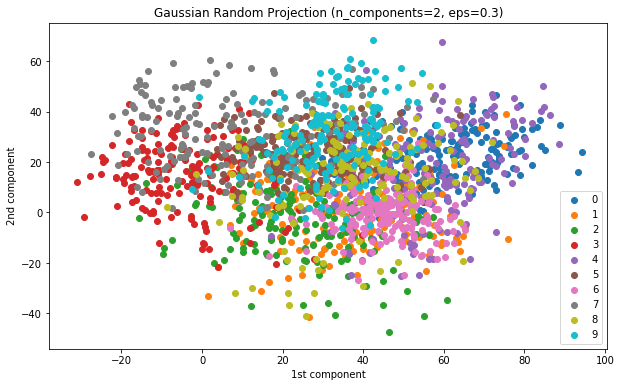

In [80]:
from sklearn.random_projection import GaussianRandomProjection

X_red = GaussianRandomProjection(n_components=2, eps=0.3).fit_transform(digits.data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=2, eps=0.3)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

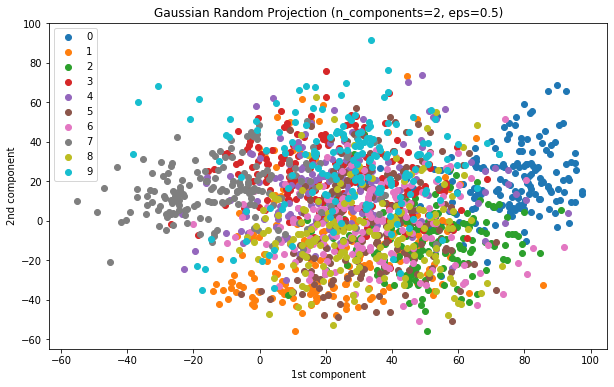

In [81]:
from sklearn.random_projection import GaussianRandomProjection

X_red = GaussianRandomProjection(n_components=2, eps=0.5).fit_transform(digits.data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=2, eps=0.5)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

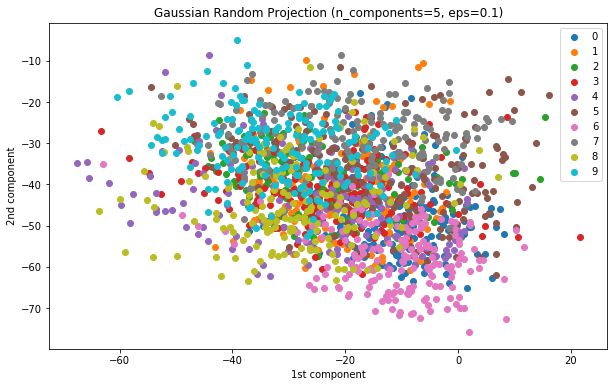

In [82]:
from sklearn.random_projection import GaussianRandomProjection

X_red = GaussianRandomProjection(n_components=5, eps=0.1).fit_transform(digits.data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=5, eps=0.1)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

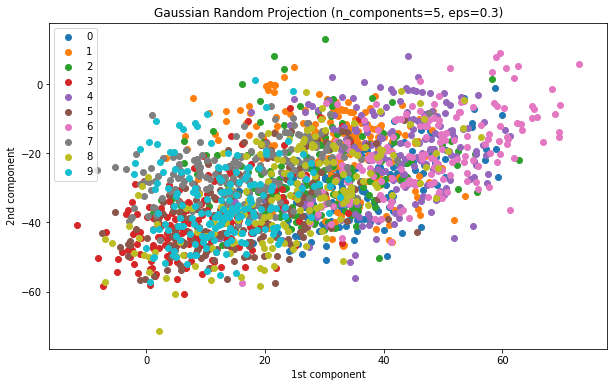

In [83]:
from sklearn.random_projection import GaussianRandomProjection

X_red = GaussianRandomProjection(n_components=5, eps=0.3).fit_transform(digits.data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=5, eps=0.3)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

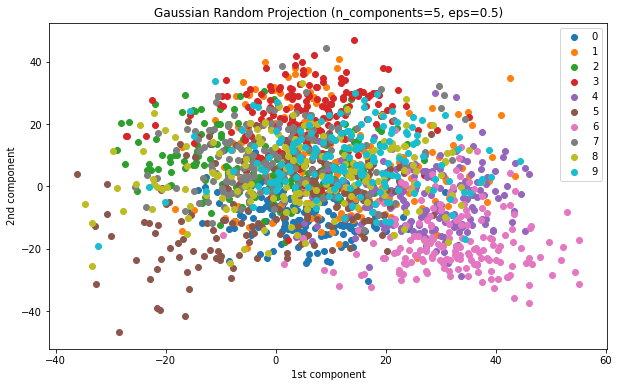

In [84]:
from sklearn.random_projection import GaussianRandomProjection

X_red = GaussianRandomProjection(n_components=5, eps=0.5).fit_transform(digits.data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=5, eps=0.5)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

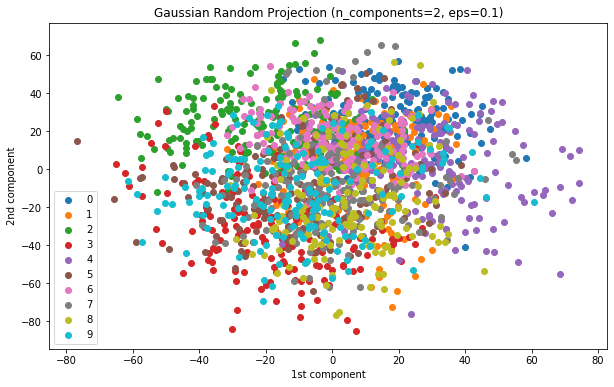

In [85]:
from sklearn.random_projection import GaussianRandomProjection

data = digits.data - digits.data.mean(axis=0)
X_red = GaussianRandomProjection(n_components=2, eps=0.1).fit_transform(data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=2, eps=0.1)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

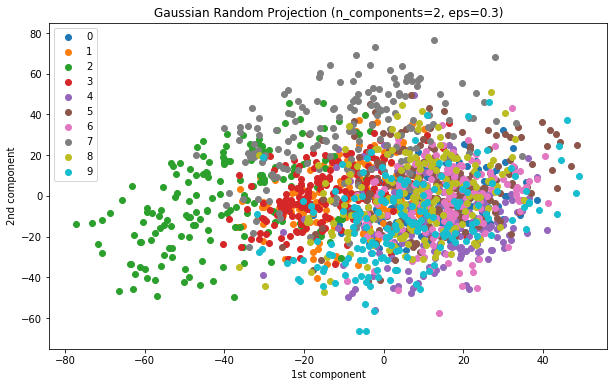

In [86]:
from sklearn.random_projection import GaussianRandomProjection

data = digits.data - digits.data.mean(axis=0)
X_red = GaussianRandomProjection(n_components=2, eps=0.3).fit_transform(data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=2, eps=0.3)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

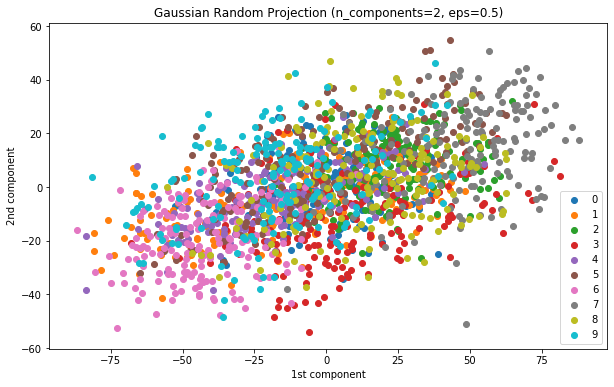

In [87]:
from sklearn.random_projection import GaussianRandomProjection

data = digits.data - digits.data.mean(axis=0)
X_red = GaussianRandomProjection(n_components=2, eps=0.5).fit_transform(data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=2, eps=0.5)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

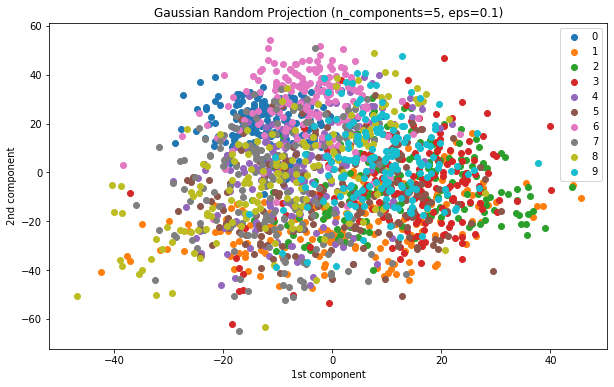

In [88]:
from sklearn.random_projection import GaussianRandomProjection

data = digits.data - digits.data.mean(axis=0)
X_red = GaussianRandomProjection(n_components=5, eps=0.1).fit_transform(data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=5, eps=0.1)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

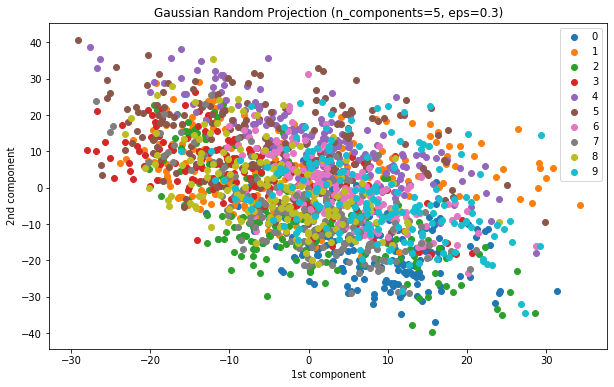

In [89]:
from sklearn.random_projection import GaussianRandomProjection

data = digits.data - digits.data.mean(axis=0)
X_red = GaussianRandomProjection(n_components=5, eps=0.3).fit_transform(data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=5, eps=0.3)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

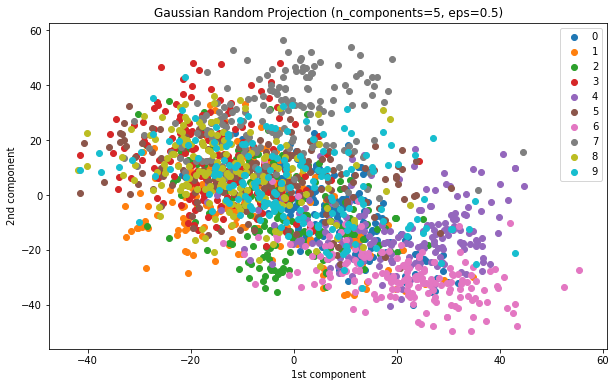

In [90]:
from sklearn.random_projection import GaussianRandomProjection

data = digits.data - digits.data.mean(axis=0)
X_red = GaussianRandomProjection(n_components=5, eps=0.5).fit_transform(data, digits.target)
x, y = X_red[:, 0], X_red[:, 1]
plt.figure(figsize=(10, 6))
plt.title('Gaussian Random Projection (n_components=5, eps=0.5)')
for i in np.unique(digits.target):
    tmp_x, tmp_y = x[digits.target == i], y[digits.target == i]
    plt.scatter(tmp_x, tmp_y, label=i)
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.legend()

**Комментарий**: Видим, что этот метод так же как и SVD позволяет разделять множества точек для разных цифр. Центрирование здесь также увеличивает качество выборки, однако даже такое улучшение показывает результаты ниже, чем SVD. При этом чем выше eps, тем ближе точки для одной цифры оказываются с "чужими" облаками.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [40]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

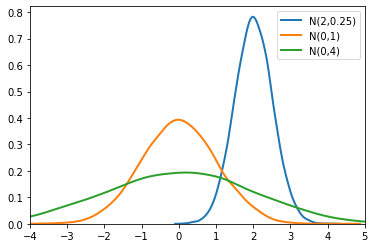

In [41]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.

**Комментарий**: $$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = c $$
$$ \ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \ln(c) $$
$$ \ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}+\ln e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \ln(c) $$ 


Так как $\Sigma$ и $n$ фиксированы, значит $\ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}$ является константой. Положим $c' := \ln(c) - \ln\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}$ и это константа, которая ясно, что меньше нуля. Тогда:

$$\ln e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = c'$$
$$ -\frac12(x - a)^T\Sigma^{-1}(x - a) = c' $$

Мы знаем, что ковариационная матрица положительно определена, значит существует базис, в котором она диагональна с положительными элементами на диагонали. Положим, что $\Sigma' = diag(\lambda_1^2, \ldots, \lambda_n^2)$ в этом базисе. Значит $\Sigma'^{-1} = diag(\frac{1}{\lambda_1^2}, \ldots, \frac{1}{\lambda_n^2})$. Тогда:


$$ -\frac12(x - a)^T\Sigma'^{-1}(x - a) =  -\frac{1}{2}(\frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2}) = c'$$
$$ \frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2} = -2c' $$

Так $c'$ меньше нуля, значит $-2c'$ - больше. Положим $c''^2 = -2c'$ и поделим обе части на $c''^2$:

$$ \frac{(x_1 - a_1)^2}{\lambda_1^2c''^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2c''^2} = 1 $$

А это и будет уравнение эллиипсоида.

**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

**Комментарий**: Kовариационная матрица положительно определена $\rightarrow$ $\exists$ базис, в котором она имеет диагональный вид с положительными элементами на диагонали.

$$\Sigma' = diag(\lambda_1^2, ... \lambda_n^2)$$
$$\Sigma'^{-1} = diag(\lambda_1^{-2}, ... \lambda_n^{-2})$$
$$ \frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2} = -2W $$
$$ -\frac12(x - a)^T\Sigma'^{-1}(x - a) =  -\frac{1}{2}(\frac{(x_1 - a_1)^2}{\lambda_1^2} + ... + \frac{(x_n - a_n)^2}{\lambda_n^2})$$

Положим $\chi_i := \frac{(x_i - a_i)^2}{\lambda_i^2}$. Ясно, что это будет одномерная составляющая. 

Выпишем функцию плотности многомерного распределения в этом базисе, подставим введенные обозначения:

$$ p(x) = \frac1{(2\pi)^{n/2}|\Sigma'|^{n/2}}e^{-\frac12(x - a)^T\Sigma'^{-1}(x - a)} = \frac1{(2\pi)^{n/2}(\lambda_1^2 \cdot \ldots \cdot \lambda_n^2)^{1/2}}e^{-\frac12(\chi_1+\ldots+\chi_n)} = $$
$$= \frac1{(2\pi)^{1/2}(\lambda_1^2)^{1/2}}e^{-\frac12\chi_1}\cdot\ldots\cdot\frac1{(2\pi)^{1/2}(\lambda_n^2)^{1/2}}e^{-\frac12\chi_n}=$$
$$ = \frac1{(2\pi)^{1/2}(\lambda_1^2)^{1/2}}e^{-\frac12\frac{(x_1 - a_1)^2}{\lambda_1^2}}\cdot\ldots\cdot\frac1{(2\pi)^{1/2}|\Sigma'|^{1/2}}e^{-\frac12\frac{(x_n - a_n)^2}{\lambda_n^2}} $$

А это и есть представление функции плотности многомерного нормального распределения в виде произведения одномерных нормальных плотностей.

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


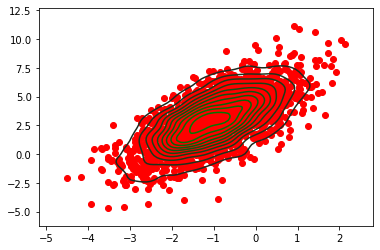

In [20]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [21]:
n = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=n)

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

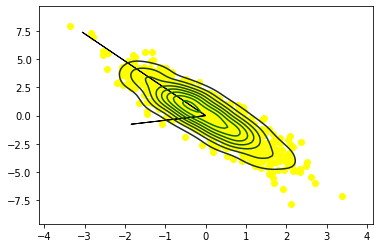

In [22]:
xU, xS, xVT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='yellow')
sns.kdeplot(X[:,0], X[:,1], shade=False, color='g')
plt.arrow(0, 0, 8 * xVT[0, 0], 8 * xVT[0, 1])
plt.arrow(0, 0, 2 * xVT[1, 0], 2 * xVT[1, 1])
plt.show()

**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

In [34]:
print(xVT)

[[-0.38433086  0.92319543]
 [ 0.92319543  0.38433086]]


$$\chi(\lambda) = (1 - \lambda)( 5 - \lambda) - 4 = \lambda^2 - 6\lambda + 1 $$
$$\lambda_{1} = 3 + \sqrt{8}$$
$$\lambda_{2} = 3 - \sqrt{8}$$

Найдём собственные вектора:

Возьмём $\lambda_{2} = 3 - \sqrt{8}$, пусть $b_{1} = \begin{pmatrix}
\beta_{1}\\
\beta_{2}
\end{pmatrix}$ собственный вектор, то есть ,


$$ \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix} \cdot  \begin{pmatrix}
\beta_{1}\\
\beta_{2}
\end{pmatrix} =  \begin{pmatrix}
\lambda_{1}\beta_{1}\\
\lambda_{1} \beta_{2}
\end{pmatrix}$$
Решаем и получаем:
$$e_{2} = \frac{1}{\sqrt{4+2\sqrt{2}}}(1+\sqrt{2}, 1)$$
Аналогично для первого значения:
$$e_{1} = \frac{1}{\sqrt{4-2\sqrt{2}}}(1-\sqrt{2}, 1)$$

Если домножить эти векторы на -1, то из них будет видно, что они почти совпадают с построенными осями.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже неадекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


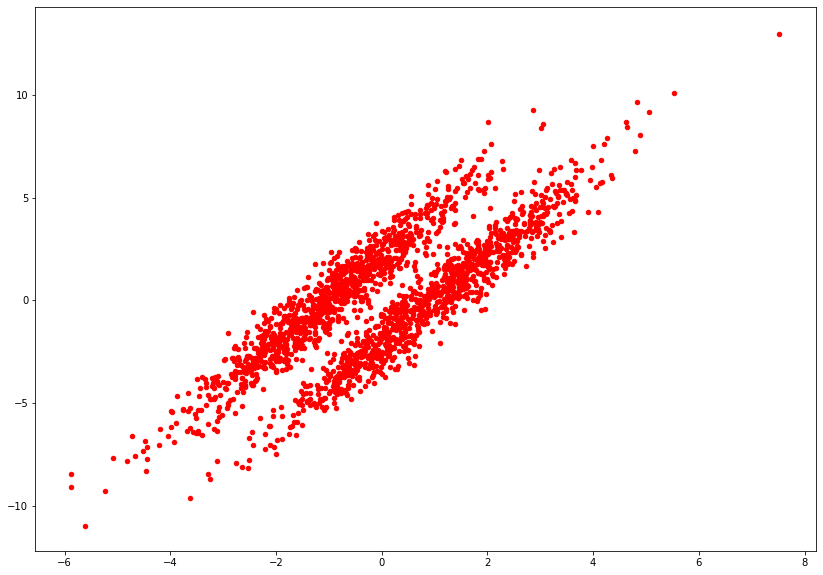

In [49]:
n = 1000
sigma = np.array([[1.82, 4.25],[4.25, 9.1669]])
plt.figure(figsize = (14, 10))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = sigma, size = n)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = sigma, size = n)
plt.scatter(s1[:,0], s1[:,1], color='red', s = 20)
plt.scatter(s2[:,0], s2[:,1], color='red', s = 20)

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


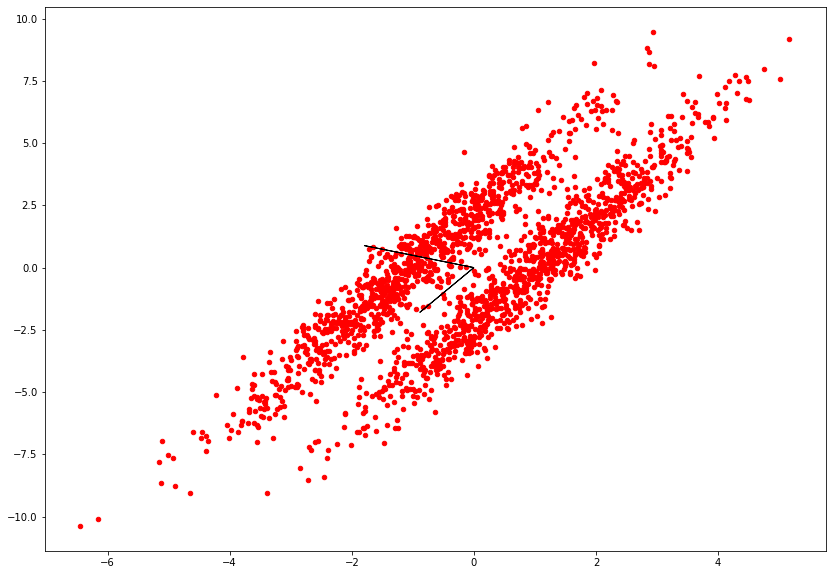

In [50]:
n = 1000
sigma = np.array([[1.82, 4.25],[4.25, 9.1669]])
plt.figure(figsize = (14, 10))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = sigma, size = n)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = sigma, size = n)
X = np.concatenate((s1, s2), axis = 0)
U, S, VT = svd(X, full_matrices=False)
plt.scatter(s1[:,0], s1[:,1], color='red', s = 20)
plt.scatter(s2[:,0], s2[:,1], color='red', s = 20)
plt.arrow(0, 0, 2 * VT[0, 0], 2* VT[0, 1])
plt.arrow(0, 0, 2 * VT[1, 0], 2* VT[1, 1])

**Комментарий**: Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

**Комментарий**: Нет, не помогает, поскольку при проекции на найденный SVD признаки эллипсы смешаются друг с другом, и потому любая функция от этих двух признаков не позволит разделять эти эллипсы (поскольку найдутся, например, совпадающие точки из разных эллипсов, имеющие одинаковые (или очень близкие, но это вопрос погрешности и случайности генерации данных) координаты при проекции на найденные оси).

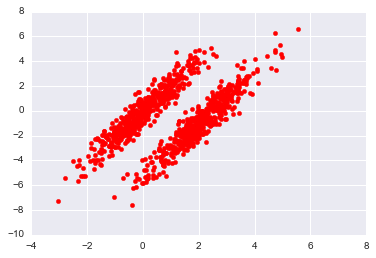

In [16]:
# Just keep this image as a sample

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [15]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)

**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

**Комментарий**: Это будут направления, параллельные осям координат, поскольку диагональная матрица ковариации говорит нам о том, что при приведении квадратичной формы к каноническому виду у нас не будет произведен поворот осей, а только их сжатие и растяжение. Это значит, что эллипс будет иметь полуоси, параллельные осям координат, просто эти оси будут разного масштаба, — и это те направления, которые мы хотим найти.

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

(-6, 6)

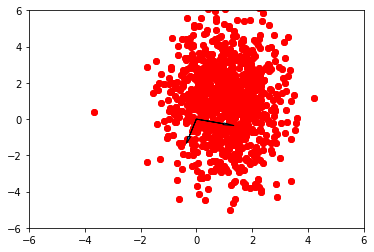

In [16]:
U, S, VT = svd(s, full_matrices=False)

plt.scatter(s[:,0], s[:,1], color='red')

plt.scatter(s[:,0], s[:,1], color='red')
plt.arrow(0, 0, VT[0][0], VT[0][1], head_width=0.1, head_length=0.4)
plt.arrow(0, 0, VT[1][0], VT[1][1], head_width=0.1, head_length=0.4)
ax = plt.gca()
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

**Комментарий**: Перед тем, как использовать SVD в анализе данных зачастую полезным бывает добиться того, чтобы облако точек было центрировано в нуле. Для этого нужно из каждого признака вычесть его средние значения.
Именно эта проблема и попортила нам кровь во второй задаче, когда нам не получилось с первого раза красиво спроецировать MNIST! Здесь из-за этого мы не смогли найти верные компоненты.